In [1]:
import logging
from datetime import datetime
from tqdm.auto import tqdm

from importlib import reload

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
log = lambda msg: print(f"{datetime.today()} {msg}")

import pandas as pd
import os

import sys
root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


In [2]:
import paramiko

hostname = os.getenv('SSH_HOST')
username = os.getenv('SSH_USERNAME')
password = os.getenv('SSH_PASSWORD')
remote_dir = '/home/graham/audio'

# Create an SSH client
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(hostname, username=username, password=password, compress=True)

stdin, stdout, stderr = ssh.exec_command(f'ls {remote_dir}')
remote_files = [f for f in stdout.read().decode().splitlines() if f.endswith(".opus")]

sftp = ssh.open_sftp()

2025-05-16 09:24:53,658 - INFO - Connected (version 2.0, client OpenSSH_9.6)
2025-05-16 09:24:53,786 - INFO - Authentication (password) successful!
2025-05-16 09:24:55,979 - INFO - [chan 1] Opened sftp connection (server version 3)


In [3]:
remote_files[0]

'recording_20240929_163920.opus'

In [4]:
from notebooks.Util.DayAndNightOfFinder import day_and_night_of

interesting = [f for f in remote_files if '20250213' in f]
interesting

['recording_20250213_000022.opus',
 'recording_20250213_000052.opus',
 'recording_20250213_000122.opus',
 'recording_20250213_000152.opus',
 'recording_20250213_000222.opus',
 'recording_20250213_000252.opus',
 'recording_20250213_000322.opus',
 'recording_20250213_000352.opus',
 'recording_20250213_000422.opus',
 'recording_20250213_000452.opus',
 'recording_20250213_000522.opus',
 'recording_20250213_000552.opus',
 'recording_20250213_000622.opus',
 'recording_20250213_000652.opus',
 'recording_20250213_000722.opus',
 'recording_20250213_000752.opus',
 'recording_20250213_000822.opus',
 'recording_20250213_000852.opus',
 'recording_20250213_000923.opus',
 'recording_20250213_000953.opus',
 'recording_20250213_001023.opus',
 'recording_20250213_001053.opus',
 'recording_20250213_001123.opus',
 'recording_20250213_001153.opus',
 'recording_20250213_001223.opus',
 'recording_20250213_001253.opus',
 'recording_20250213_001323.opus',
 'recording_20250213_001353.opus',
 'recording_20250213

In [5]:
interesting2 = [f for f in interesting if f.removesuffix('.opus').split('_')[2].startswith('054')]
interesting2

['recording_20250213_054017.opus',
 'recording_20250213_054047.opus',
 'recording_20250213_054117.opus',
 'recording_20250213_054147.opus',
 'recording_20250213_054217.opus',
 'recording_20250213_054247.opus',
 'recording_20250213_054317.opus',
 'recording_20250213_054347.opus',
 'recording_20250213_054417.opus',
 'recording_20250213_054447.opus',
 'recording_20250213_054517.opus',
 'recording_20250213_054548.opus',
 'recording_20250213_054618.opus',
 'recording_20250213_054648.opus',
 'recording_20250213_054718.opus',
 'recording_20250213_054748.opus',
 'recording_20250213_054818.opus',
 'recording_20250213_054848.opus',
 'recording_20250213_054918.opus',
 'recording_20250213_054948.opus']

In [6]:
# import audio
# reload(audio)

# local_dir = 'C:\\Users\\graha\\Documents\\Audacity'
# filename = "tmpwlaxje77.wav"
# audio.load_and_display_wav_audio(os.path.join(local_dir, filename))

recording_20250515_215536.opus: 100%|##########| 463k/463k [00:00<00:00, 2.53MB/s]

Temp filename:  C:\Users\graha\AppData\Local\Temp\tmpnbcnnyh4.opus



Read Ogg Opus file
Channels:
   1
Frequency (samples per second):
   48000
Buffer Length (bytes):
   2880000
Original audio data shape: (1440000, 1)
Original audio data type: int16
Original audio data range: -20673 to 22299
Original audio data mean: -0.02195972222222222
Original audio data std dev: 413.7163346706607
Sample rate: 48000 Hz
Original duration: 30.00 seconds
Audio data shape: (1440000, 1)
Audio data type: int16
Audio data range: -20673 to 22299
Audio data mean: -0.02195972222222222
Audio data std dev: 413.7163346706607
Audio data RMS: 64.32321725300886
Sample rate: 48000 Hz
Duration: 30.00 seconds


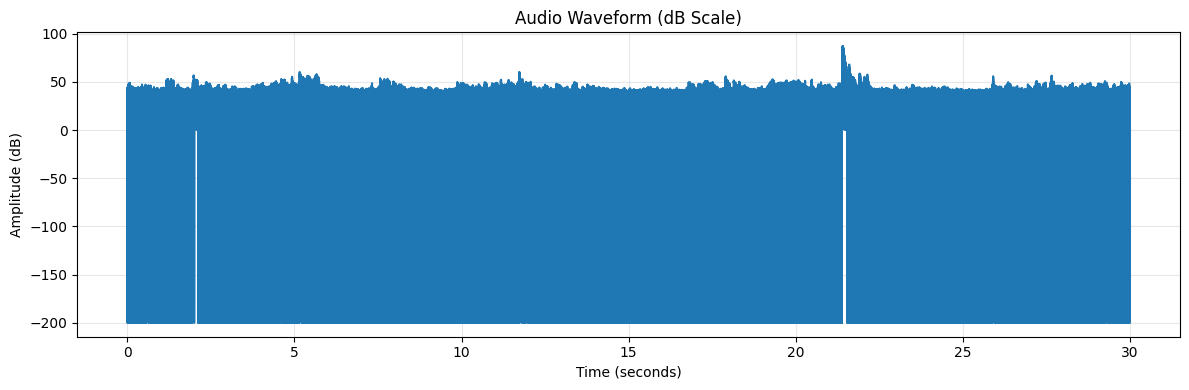

Audio data shape: (1440000, 1)
Audio data type: int16
Audio data range: -20673 to 22299
Audio data mean: -0.02195972222222222
Audio data std dev: 413.7163346706607
Audio data RMS: 64.32321725300886
Sample rate: 48000 Hz
Duration: 30.00 seconds


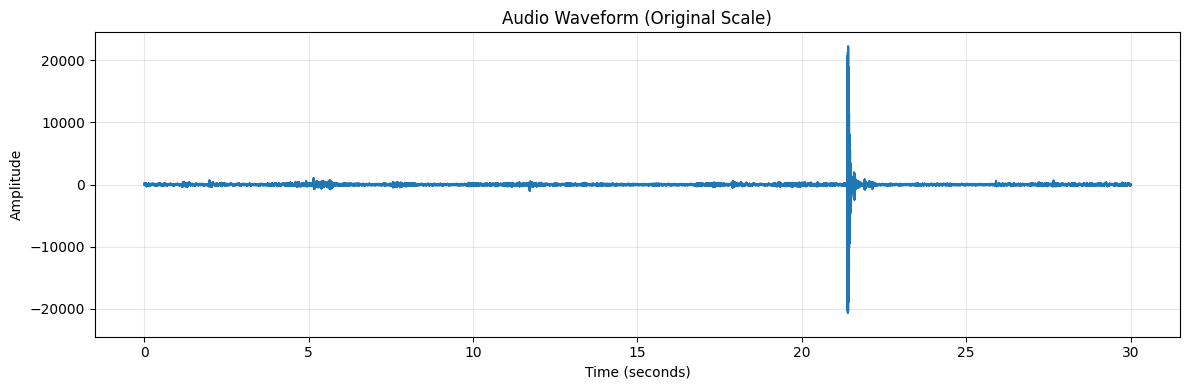

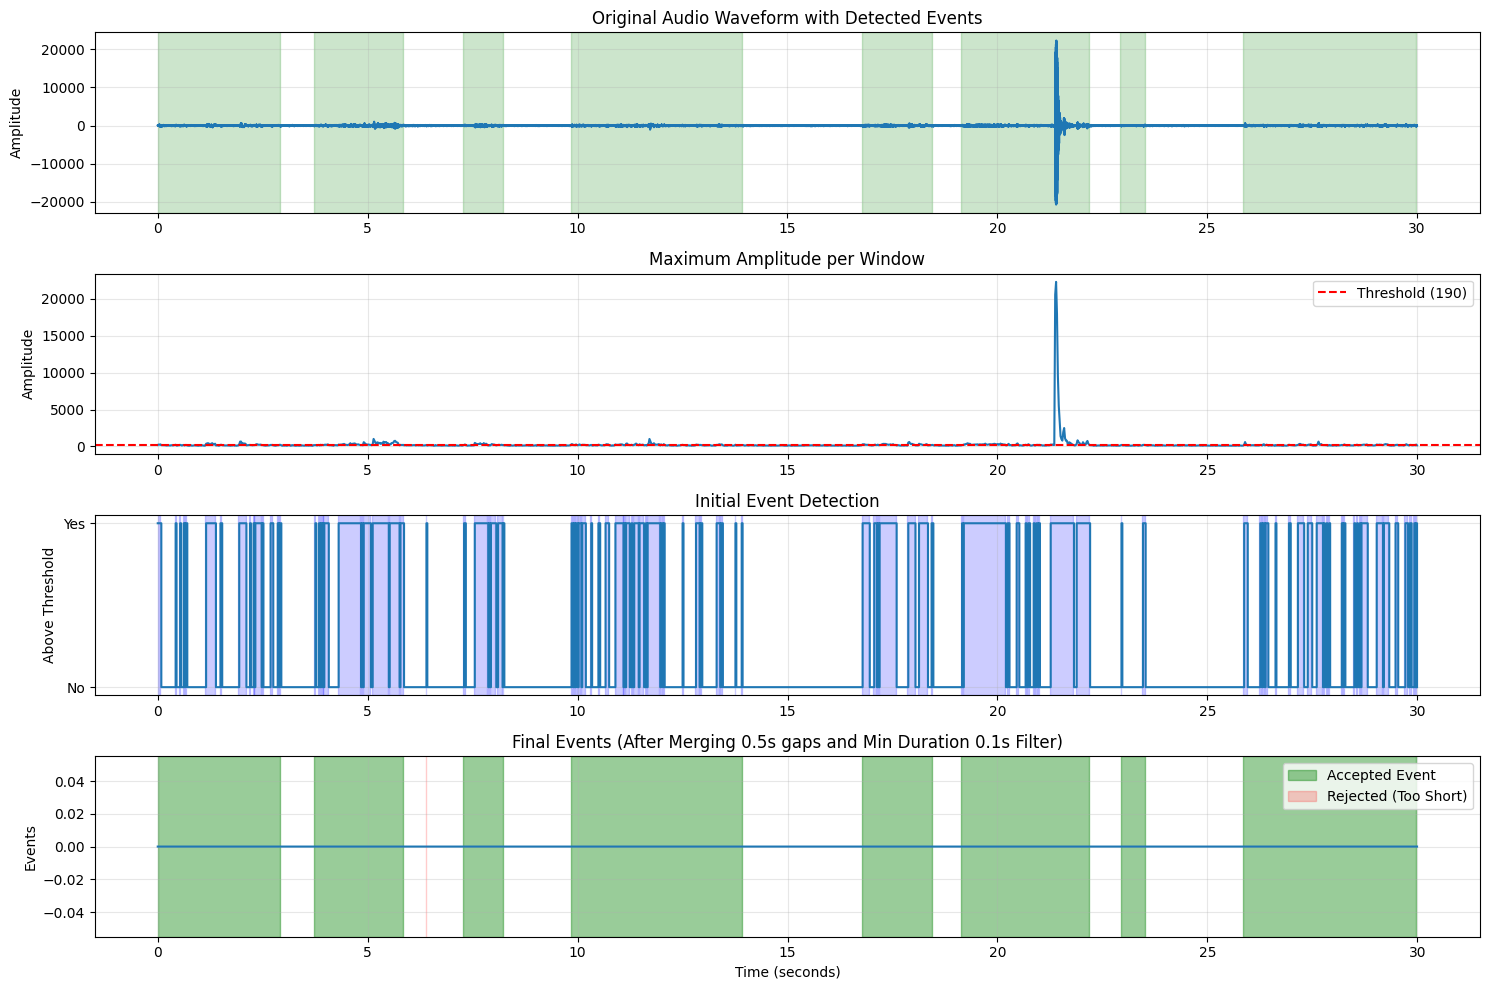

Audio data - min: -20673, max: 22299


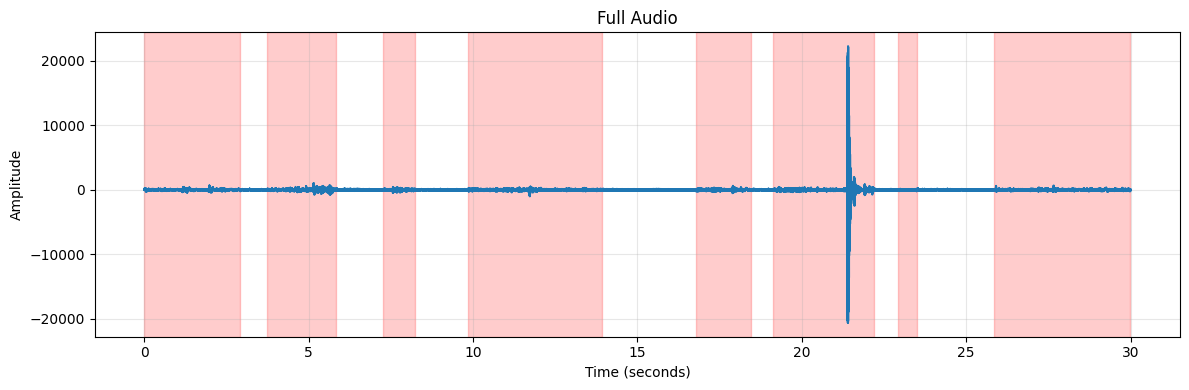

In [31]:

import audio
reload(audio)

remote_dir = '/home/graham/audio'
# filename = "recording_20250405_124536.opus"
filename = "recording_20250515_215536.opus"
data_array, ogg = audio.get_audio(sftp, remote_dir, filename)

bp = audio.best_silence_detection_params_new_mic

sample_rate = ogg.frequency

events = audio.find_audio_events_amplitude(
    data_array,
    sample_rate,
    filename,
    amplitude_threshold=190,
)

display(audio.play_audio_widget(data_array, ogg))

if len(events) > 0:
    # Plot events
    audio.plot_audio_events(data_array, events)
else:
    print("No events found")



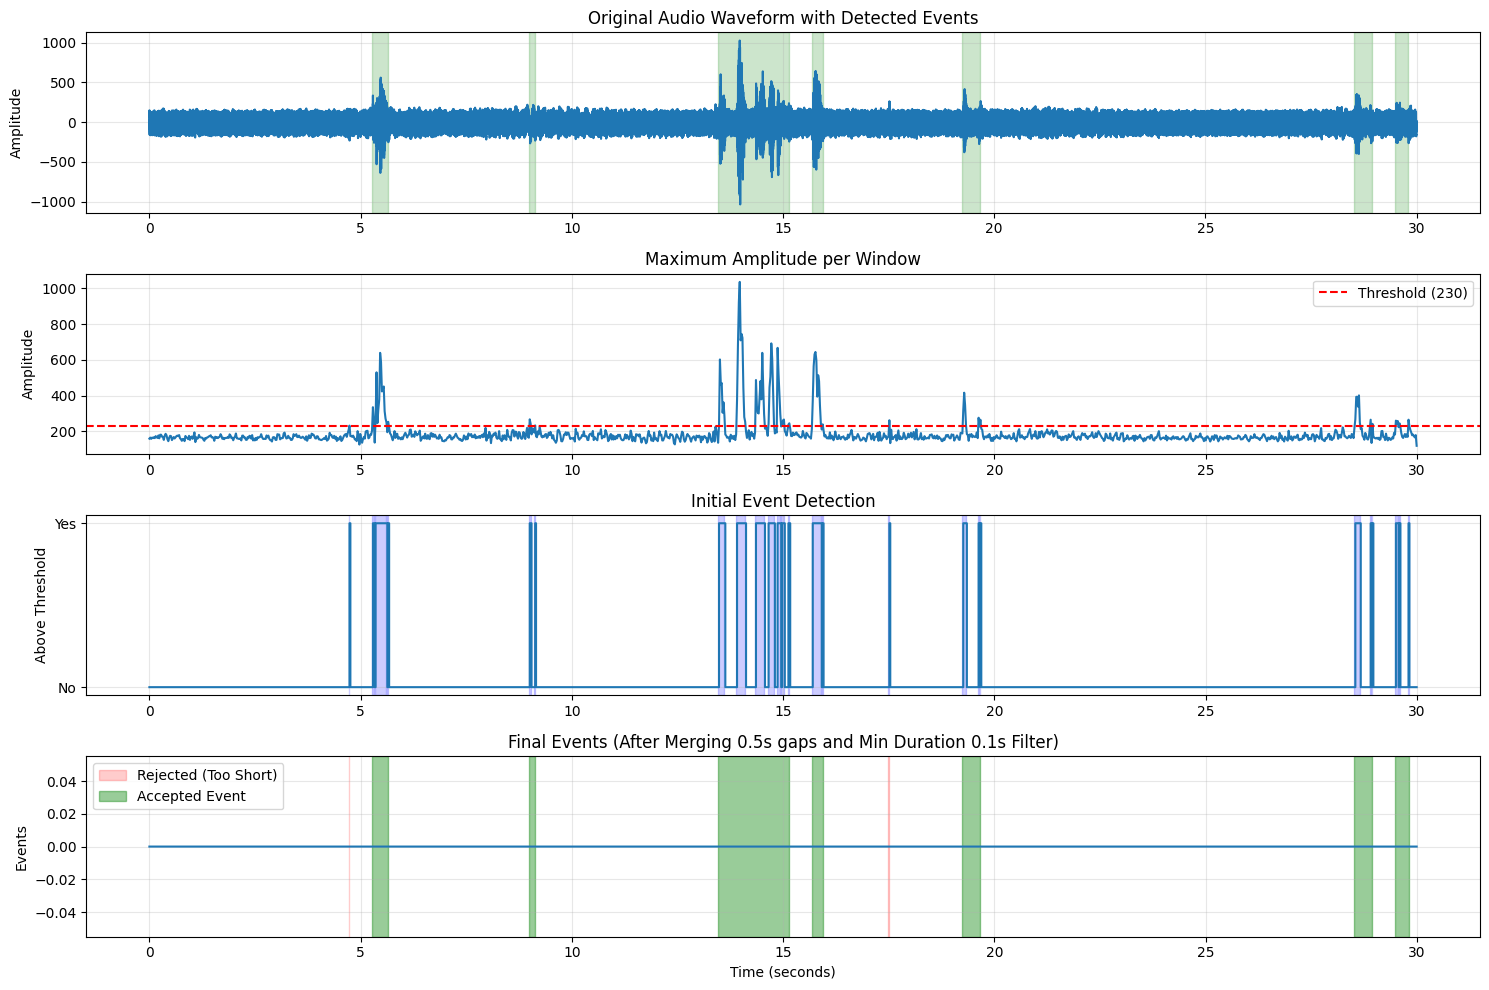

In [23]:

import audio
reload(audio)

events = audio.find_audio_events_amplitude(
    data_array,
    sample_rate,
    filename,
    amplitude_threshold=230,
)

Audio data shape: (1440000, 1)
Audio data type: int16
Audio data range: -1036 to 1027
Audio data mean: 0.04660902777777778
Audio data std dev: 84.36350829866926
Audio data RMS: 77.88270022123012
Sample rate: 48000 Hz
Duration: 30.00 seconds


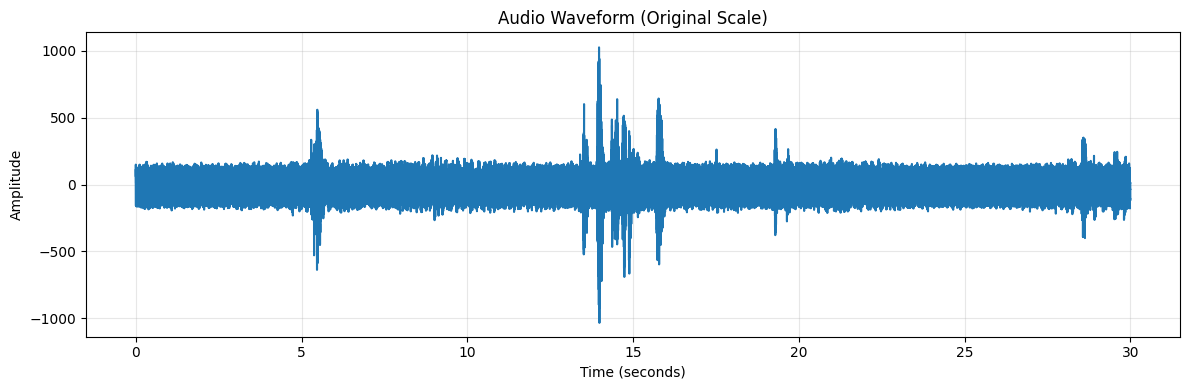

Audio data shape: (1440000,)
Audio data type: float64
Audio data range: -220.73057743012197 to 214.357789823926
Audio data mean: 0.0431746358789088
Audio data std dev: 53.205658311609874
Audio data RMS: 53.20567582900309
Sample rate: 48000 Hz
Duration: 30.00 seconds


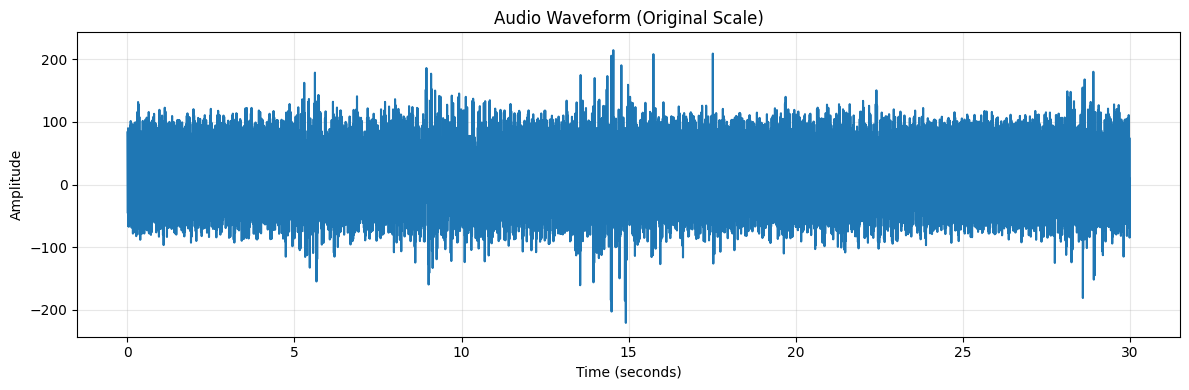

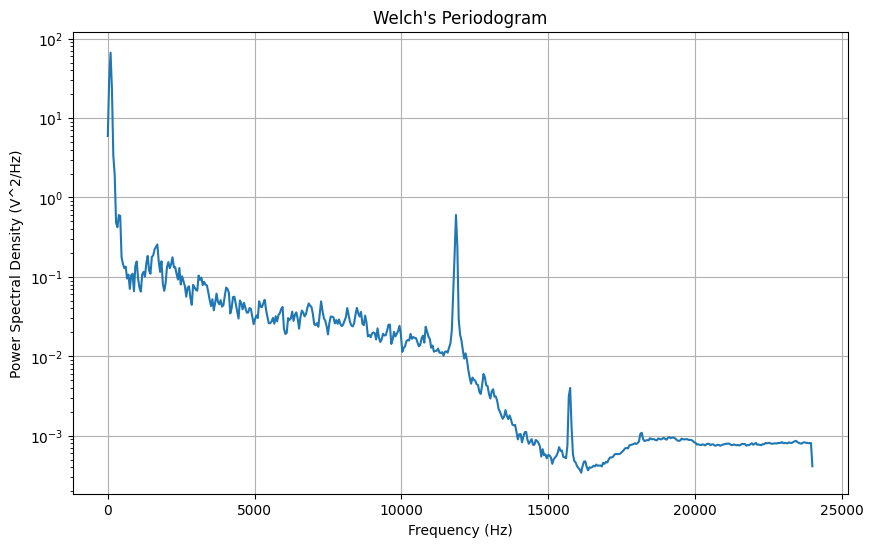

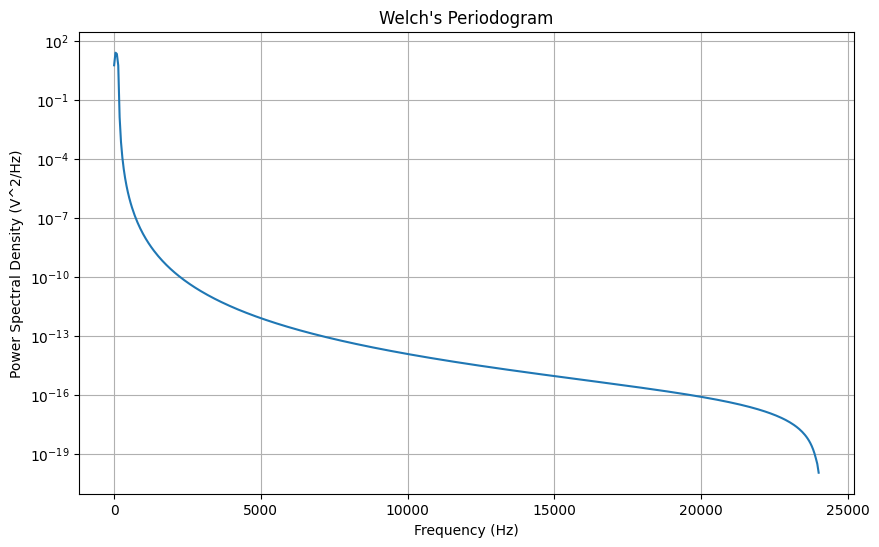

Audio data - min: -1036, max: 1027


Audio data - min: -220.73057743012197, max: 214.357789823926


In [26]:
import audio
reload(audio)
filtered_data = audio.filter_audio(data_array, sample_rate)

audio.display_waveform(data_array, sample_rate)
audio.display_waveform(filtered_data, sample_rate)
audio.plot_power_spectrum(data_array, sample_rate)
audio.plot_power_spectrum(filtered_data, sample_rate)
display(audio.play_audio_widget(data_array, ogg))
display(audio.play_audio_widget(filtered_data, ogg))

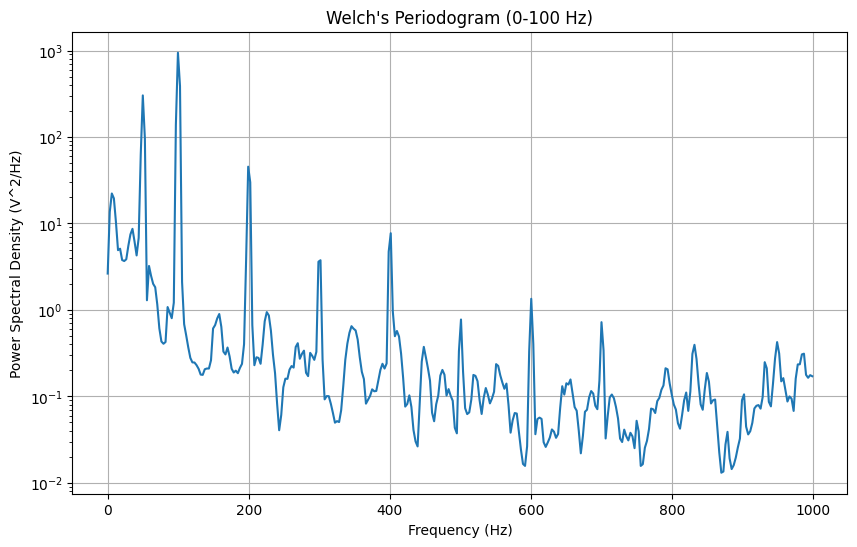

In [27]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Flatten the data_array to 1D
data_array_flat = np.ravel(data_array)

# Compute Welch's periodogram
frequencies, power_spectrum = signal.welch(data_array_flat, fs=sample_rate, nperseg=16384)

mask = frequencies <= 1000
frequencies_filtered = frequencies[mask]
power_spectrum_filtered = power_spectrum[mask]

# Plot the periodogram for the first 100 Hz
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_filtered, power_spectrum_filtered)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Welch\'s Periodogram (0-100 Hz)')
plt.grid()
plt.show()